# Modelo de Regresion Logistica
## Jacobo P. Marín
#### Universidad Nacional Abierta y a Distancia
#### Dataset: Titanic-Dataset

### 1. Importación de Librerías y Datos

In [166]:
import pandas as pd  # Para manipular datos
import numpy as np   # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos estadísticos

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [167]:
# Leer el dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar las primeras filas
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [168]:
df.columns = df.columns.str.strip()
print("\nNombres de las columnas despues de limpiar:")
print(df.columns.tolist())


Nombres de las columnas despues de limpiar:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### 2. Análisis Exploratorio

In [171]:
#Descripcion de los datos

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [173]:
#Informacion de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [175]:
# Verificar valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 3. Preprocesamiento

In [180]:
# Verificar duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Verificar valores nulos
print("\nValores nulos en el dataset:\n", df.isnull().sum())

print("\n")

#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad: ",df['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",df['Fare'].isin([0]).sum())


Número de filas duplicadas: 0

Valores nulos en el dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Fare:  15


In [182]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

df['Age']=df['Age'].replace(0,df['Age'].mean())
df['Fare']=df['Fare'].replace(0,df['Fare'].mean())

#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad: ",df['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",df['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Fare:  0


Text(0.5, 1.0, 'Identificacion de datos atipicos')

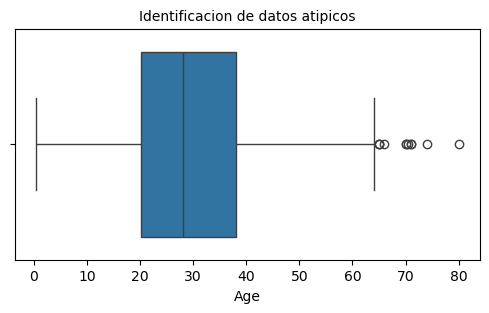

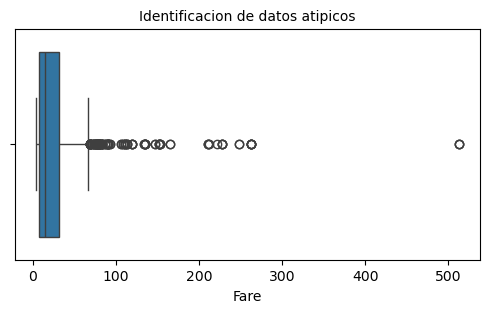

In [184]:
# Identificación de valores Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Age'])
plt.title('Identificacion de datos atipicos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Fare'])
plt.title('Identificacion de datos atipicos', fontsize=10)

In [186]:
#Conteo de Datos Atipicos variable Fare

nivel_min=0
nivel_max=500

Total_Atipicos=((df['Fare']<nivel_min)|(df['Fare']>nivel_max)).sum()
print("El total de datos atipicos en la variable Fare es {}".format(Total_Atipicos))

El total de datos atipicos en la variable Fare es 3


In [188]:
#Filtro de datos atipicos

df=df[(df['Fare']<nivel_max)&(df['Fare']>nivel_min)]

Total_Atipicos=((df['Fare']<nivel_min)|(df['Fare']>nivel_max)).sum()
print("El total de datos atipicos en la variable Fare es {}".format(Total_Atipicos))

El total de datos atipicos en la variable Fare es 0


In [190]:
#Revisión del tipo de datos y datos faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


In [192]:
# Identificar valores faltantes
print(df.isnull().sum())

# Rellenar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Eliminar columnas no relevantes
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar el dataset después del preprocesamiento
print(df.head())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


C:\Users\USER\AppData\Local\Temp\ipykernel_12364\2438703546.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12364\2438703546.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### 4. Selección de características

In [194]:
# Selección de características
X = df.drop('Survived', axis=1)  # Variables independientes
y = df['Survived']               # Variable objetivo

### 5. Division del Dataset en Train y Test

In [196]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [198]:
print (X_train)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
311          312       1  18.0      2      2  262.3750     False       False   
318          319       1  31.0      0      2  164.8667     False       False   
706          707       2  45.0      0      0   13.5000     False       False   
347          348       3  28.0      1      0   16.1000     False       False   
490          491       3  28.0      1      0   19.9667      True       False   
..           ...     ...   ...    ...    ...       ...       ...         ...   
838          839       3  32.0      0      0   56.4958      True       False   
192          193       3  19.0      1      0    7.8542     False       False   
630          631       1  80.0      0      0   30.0000      True       False   
560          561       3  28.0      0      0    7.7500      True        True   
686          687       3  14.0      4      1   39.6875      True       False   

     Embarked_S  
311       False  
318

In [200]:
print (y_train)

311    1
318    1
706    1
347    1
490    0
      ..
838    1
192    1
630    1
560    0
686    0
Name: Survived, Length: 666, dtype: int64


### 6. Entranamiento del modelo

In [202]:
#Construcción del modelo de regresión logistica
modelo_regresion = LogisticRegression(solver = "liblinear")

modelo_regresion.fit (X_train, y_train)

#Hacer predicciones
prediccion = modelo_regresion.predict(X_test)

In [204]:
print (prediccion)

[1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0]


### 7. Evaluación

In [207]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       131
           1       0.77      0.65      0.70        91

    accuracy                           0.77       222
   macro avg       0.77      0.76      0.76       222
weighted avg       0.77      0.77      0.77       222



### 8. Visualización de resultados

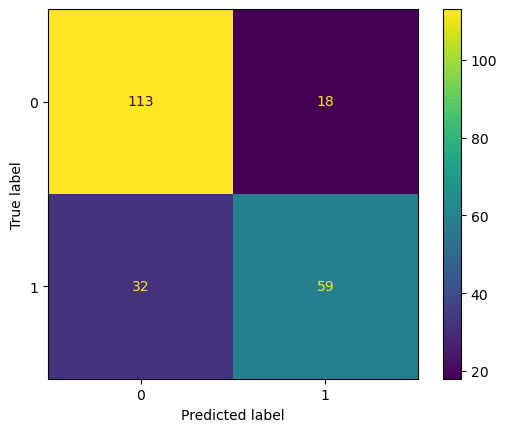

In [210]:
#Matrix de confuncion del modelo

cm = confusion_matrix(y_test, prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

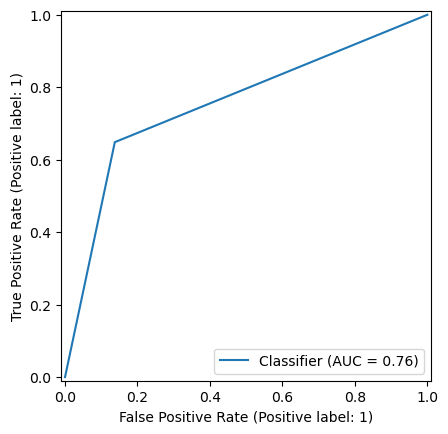

In [212]:
#Curva de precision del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediccion)
plt.show()